# Import Package and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import csv

In [ ]:
data=pd.read_csv("sleep_scoring_ground_true.csv")
data.head(5)

,Unnamed: 0,sleep_labels,motion,delta,theta,alpha,beta,gamma,lowgamma,highgamma,fastoscillations,sigma,thetaratio,AnimalName,Geno,Date
0,0,2.0,NaN,0.321147,0.314446,0.186082,0.132685,0.034842,0.010926,0.002769,0.005548,0.214435,0.485290,CAF22,TE4,2020-04-20_12-07-45
1,1,2.0,NaN,0.450377,0.238804,0.130794,0.090249,0.063676,0.016838,0.007529,0.012827,0.208465,0.317277,CAF22,TE4,2020-04-20_12-07-45
2,2,2.0,NaN,0.326391,0.287190,0.149400,0.150537,0.058311,0.023801,0.008066,0.011828,0.201474,0.416426,CAF22,TE4,2020-04-20_12-07-45
3,3,2.0,NaN,0.476368,0.257943,0.109771,0.069822,0.057446,0.021455,0.005776,0.012171,0.139257,0.439963,CAF22,TE4,2020-04-20_12-07-45
4,4,2.0,NaN,0.151375,0.496002,0.190633,0.070405,0.062607,0.024616,0.005654,0.013890,0.189229,0.719037,CAF22,TE4,2020-04-20_12-07-45


In [ ]:
data.shape

(846900, 16)

# Data Cleaning and Preprocessing

## Remove missing data

In [ ]:
# drop irrelevant columns
data = data.drop(['Date','Unnamed: 0', 'Geno', 'AnimalName'], axis=1)

In [ ]:
# drop null data
null = pd.DataFrame({'Null Values':data.isna().sum().sort_values(ascending=False),
                   'Percentage Null Values':(data.isna().sum().sort_values(ascending=False))/(data.shape[0])*(100)})
null

,Null Values,Percentage Null Values
motion,51336,6.061637
delta,5054,0.596765
theta,5054,0.596765
alpha,5054,0.596765
highgamma,5054,0.596765
beta,5054,0.596765
gamma,5054,0.596765
lowgamma,5054,0.596765
sigma,5054,0.596765
fastoscillations,5054,0.596765


In [ ]:
data=data.dropna() # Remove all null value

In [ ]:
null = pd.DataFrame({'Null Values':data.isna().sum().sort_values(ascending=False),
'Percentage Null Values':(data.isna().sum().sort_values(ascending=False))/(data.shape[0])*(100)})
null

,Null Values,Percentage Null Values
sleep_labels,0,0.0
motion,0,0.0
delta,0,0.0
theta,0,0.0
alpha,0,0.0
beta,0,0.0
gamma,0,0.0
lowgamma,0,0.0
highgamma,0,0.0
fastoscillations,0,0.0


In [ ]:
data.shape

(790834, 12)

## Data Visualization

In [ ]:
data['sleep_labels'].value_counts()

sleep_labels
1.0    422507
2.0    316481
3.0     51846
Name: count, dtype: int64

<BarContainer object of 3 artists>

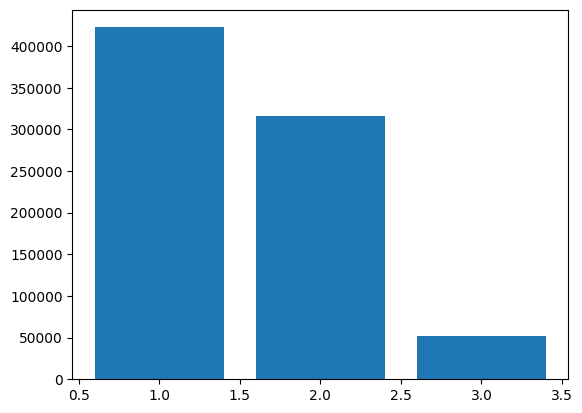

In [ ]:
plt.bar(data['sleep_labels'].value_counts().index,data['sleep_labels'].value_counts())

## Apply Standardization

In [ ]:
# standardization function
def standardization(dataframe):
    df_std = dataframe.copy()
    for col in df_std.columns:
        df_std[col] =(df_std[col]-df_std[col].mean())/df_std[col].std()
    return df_std

# Model Training

## Split dataset

In [ ]:
label = data['sleep_labels']
feature = data.drop(['sleep_labels'], axis=1)

In [ ]:
standardized_feature=standardization(feature)

In [ ]:
train_X,test_X,train_Y,test_Y=train_test_split(standardized_feature,label,test_size=0.3,random_state=543)

In [58]:
# smote data balancing
smote = SMOTE()
train_X, train_Y = smote.fit_resample(train_X, train_Y)

## SVM

In [98]:
# Create an SVM model
model = svm.SVC(kernel='rbf', gamma='scale', C=10, class_weight='balanced', max_iter=50,random_state=543)
# Train the model using the training sets
clf = model.fit(train_X, train_Y)
# Predict the response for the test dataset
pred_y = clf.predict(test_X)
print('rbf',"Accuracy:", metrics.accuracy_score(test_Y, pred_y))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


rbf Accuracy: 0.5949943308984998


### Results

In [99]:
print(classification_report(test_Y, pred_y,digits=4))

              precision    recall  f1-score   support

         1.0     0.6601    0.5634    0.6079    126771
         2.0     0.5505    0.7262    0.6263     94918
         3.0     0.2104    0.0519    0.0833     15562

    accuracy                         0.5950    237251
   macro avg     0.4737    0.4472    0.4392    237251
weighted avg     0.5868    0.5950    0.5809    237251



Accuracy: 0.5949943308984998
Precision: 0.5867680577258632
Recall: 0.5949943308984998
F1 Score: 0.5808618003336841


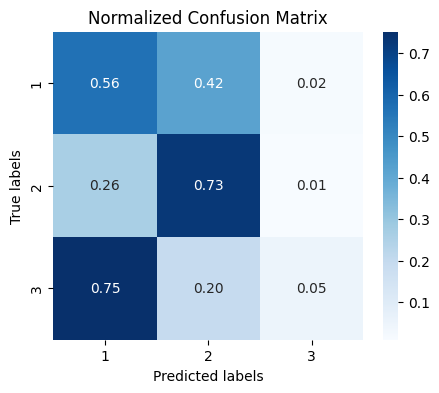

In [100]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

cm = confusion_matrix(test_Y, pred_y)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Calculate accuracy and other metrics
accuracy = accuracy_score(test_Y, pred_y)
precision, recall, f1_score, _ = precision_recall_fscore_support(test_Y, pred_y, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Plotting the confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_normalized, annot=True, ax=ax, cmap='Blues', fmt='.2f')

# Labels, title and ticks
label_classes = np.unique(test_Y)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['1', '2', '3'])
ax.yaxis.set_ticklabels(['1', '2', '3'])
plt.show()

## Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=20,
                            criterion='entropy',
                            class_weight='balanced')
rf.fit(train_X, train_Y)
pred_y = rf.predict(test_X)
print('random forest accuracy:',rf.score(test_X, test_Y))

random forest accuracy: 0.752350885770766


### Results

In [40]:
print(classification_report(test_Y, pred_y,digits=4))

              precision    recall  f1-score   support

         1.0     0.8164    0.7519    0.7828    126771
         2.0     0.7474    0.7863    0.7663     94918
         3.0     0.4140    0.5492    0.4721     15562

    accuracy                         0.7524    237251
   macro avg     0.6593    0.6958    0.6738    237251
weighted avg     0.7624    0.7524    0.7558    237251



Accuracy: 0.752350885770766
Precision: 0.7624079596499284
Recall: 0.752350885770766
F1 Score: 0.7558496416698529


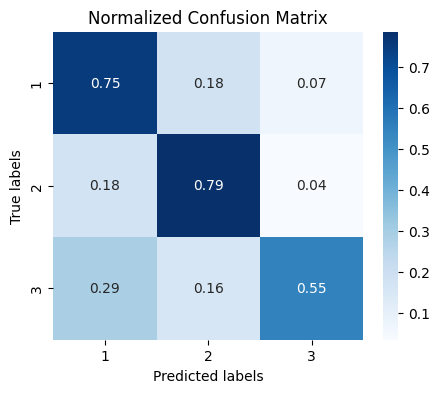

In [41]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

cm = confusion_matrix(test_Y, pred_y)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Calculate accuracy and other metrics
accuracy = accuracy_score(test_Y, pred_y)
precision, recall, f1_score, _ = precision_recall_fscore_support(test_Y, pred_y, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Plotting the confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_normalized, annot=True, ax=ax, cmap='Blues', fmt='.2f')

# Labels, title and ticks
label_classes = np.unique(test_Y)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['1', '2', '3'])
ax.yaxis.set_ticklabels(['1', '2', '3'])
plt.show()